# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Three observable trends based on the data
     1. As expected, the temperature is higher the closer you get to the equator. However, the data shows that the temperature is generally higher in the southern hempishere as it relates to latitude.
     2. Humidity levels are generally higher across the cities. Humidity levels tend to be higher in cities in the northern hemisphere and tend to fall lower in the southern hemisphere, due to drier climates.
     3. There is low correlation between cloud coverage and latitude. The northern hemisphere shows a slightly higher concentration of high cloud coverage.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=' + weather_api_key

#query_url = url + "appid=" + weather_api_key + "&q=" + city

In [4]:
response = (requests.get(url + '&q=' + city)).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 37.1041, 'lon': -113.5841},
 'dt': 1612986432,
 'id': 5546220,
 'main': {'feels_like': 55.02,
          'humidity': 35,
          'pressure': 1016,
          'temp': 61.09,
          'temp_max': 63,
          'temp_min': 55.4},
 'name': 'Saint George',
 'sys': {'country': 'US',
         'id': 5832,
         'sunrise': 1612967301,
         'sunset': 1613005737,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 262, 'speed': 4.76}}


In [5]:
# lists to hold items
city_name = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind = []

# set counter
counter = 1


for city in cities:
    try:
        response = (requests.get(url + '&q=' + city)).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f'City number {counter} of {len(cities)} complete. | Added {city}')
        counter = counter + 1
    
    except KeyError:
        print(f'Missing data in city number {counter} of {len(cities)}. | Skipping {city}')
        counter = counter + 1
        
    #finally:
        #break

City number 1 of 590 complete. | Added severodvinsk
City number 2 of 590 complete. | Added koran
City number 3 of 590 complete. | Added butaritari
City number 4 of 590 complete. | Added goundam
City number 5 of 590 complete. | Added ajdabiya
City number 6 of 590 complete. | Added batagay
City number 7 of 590 complete. | Added bluff
City number 8 of 590 complete. | Added acurenam
City number 9 of 590 complete. | Added saint-francois
City number 10 of 590 complete. | Added vao
Missing data in city number 11 of 590. | Skipping palabuhanratu
City number 12 of 590 complete. | Added hilo
Missing data in city number 13 of 590. | Skipping sentyabrskiy
City number 14 of 590 complete. | Added thompson
City number 15 of 590 complete. | Added ngama
City number 16 of 590 complete. | Added portree
City number 17 of 590 complete. | Added chuy
City number 18 of 590 complete. | Added punta arenas
Missing data in city number 19 of 590. | Skipping taolanaro
City number 20 of 590 complete. | Added fairban

City number 164 of 590 complete. | Added los llanos de aridane
City number 165 of 590 complete. | Added pisco
City number 166 of 590 complete. | Added bam
City number 167 of 590 complete. | Added ponta do sol
City number 168 of 590 complete. | Added grajewo
City number 169 of 590 complete. | Added sitka
Missing data in city number 170 of 590. | Skipping attawapiskat
City number 171 of 590 complete. | Added bud
City number 172 of 590 complete. | Added goderich
City number 173 of 590 complete. | Added havre-saint-pierre
City number 174 of 590 complete. | Added waitati
City number 175 of 590 complete. | Added kawalu
City number 176 of 590 complete. | Added avarua
City number 177 of 590 complete. | Added qaanaaq
City number 178 of 590 complete. | Added umkomaas
City number 179 of 590 complete. | Added tiksi
City number 180 of 590 complete. | Added jijiga
City number 181 of 590 complete. | Added lebu
City number 182 of 590 complete. | Added kesan
City number 183 of 590 complete. | Added lim

City number 324 of 590 complete. | Added santiago
City number 325 of 590 complete. | Added dzilam gonzalez
City number 326 of 590 complete. | Added majene
City number 327 of 590 complete. | Added buala
City number 328 of 590 complete. | Added alice springs
City number 329 of 590 complete. | Added cabo san lucas
City number 330 of 590 complete. | Added christchurch
City number 331 of 590 complete. | Added coquimbo
City number 332 of 590 complete. | Added fayaoue
City number 333 of 590 complete. | Added coachella
City number 334 of 590 complete. | Added comodoro rivadavia
City number 335 of 590 complete. | Added bima
City number 336 of 590 complete. | Added coro
City number 337 of 590 complete. | Added viedma
Missing data in city number 338 of 590. | Skipping utiroa
City number 339 of 590 complete. | Added san carlos
City number 340 of 590 complete. | Added karaton
City number 341 of 590 complete. | Added port hedland
City number 342 of 590 complete. | Added cap malheureux
City number 34

City number 484 of 590 complete. | Added male
City number 485 of 590 complete. | Added opuwo
City number 486 of 590 complete. | Added yar-sale
City number 487 of 590 complete. | Added champerico
City number 488 of 590 complete. | Added miri
City number 489 of 590 complete. | Added amontada
City number 490 of 590 complete. | Added avera
City number 491 of 590 complete. | Added taitung
City number 492 of 590 complete. | Added troitsko-pechorsk
City number 493 of 590 complete. | Added minsk
City number 494 of 590 complete. | Added slavyanka
City number 495 of 590 complete. | Added talnakh
City number 496 of 590 complete. | Added benalla
City number 497 of 590 complete. | Added kaeo
City number 498 of 590 complete. | Added jalu
City number 499 of 590 complete. | Added aranos
City number 500 of 590 complete. | Added sinnamary
City number 501 of 590 complete. | Added makakilo city
City number 502 of 590 complete. | Added matara
City number 503 of 590 complete. | Added beringovskiy
Missing da

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame({'City': city_name,
                       'Latitude': lat,
                       'Longitude': lng,
                       'Temperature': temp,
                       'Humidity': humidity,
                       'Cloudiness': clouds,
                       'Wind': wind})

city_df.to_csv("new_city_data.csv")

In [7]:
city_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind
0,Severodvinsk,64.5635,39.8302,-4.00,84,90,2.24
1,Koran,43.8103,18.5689,44.29,100,75,4.61
2,Butaritari,3.0707,172.7902,81.34,77,100,15.75
3,Goundam,16.4145,-3.6708,81.45,14,8,9.51
4,Ajdabiya,30.7554,20.2263,65.05,27,0,10.51


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
city_df["Humidity"].max()

100

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot shows that the closer you get to the equator, the higher the temperature is. However, the temperature is generally higher in the southern hemisphere in relation to latitude


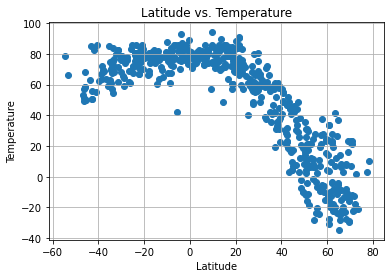

In [11]:
plt.scatter(city_df['Latitude'], city_df['Temperature'])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
print(f"The plot shows that the closer you get to the equator, the higher the temperature is. However, the temperature is generally higher in the southern hemisphere in relation to latitude")
plt.savefig("latitude_temp.png")

## Latitude vs. Humidity Plot

Humidity levels are generally higher across these cities. Humidity levels are high near the equator and are higher in the northern hemisphere than in the southern.


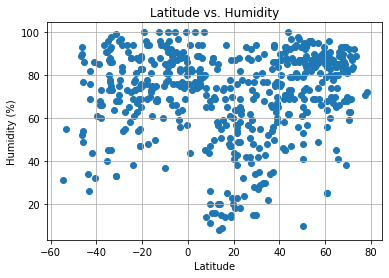

In [12]:
plt.scatter(city_df['Latitude'], city_df['Humidity'])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
print(f"Humidity levels are generally higher across these cities. Humidity levels are high near the equator and are higher in the northern hemisphere than in the southern.")
plt.savefig("latitude_humidity.png")

## Latitude vs. Cloudiness Plot

The plot shows that there is no significant correlation between latitude and cloudiness


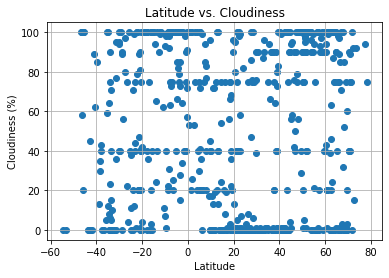

In [13]:
plt.scatter(city_df['Latitude'], city_df['Cloudiness'])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
print(f"The plot shows that there is no significant correlation between latitude and cloudiness")
plt.savefig("latitude_cloudiness.png")

## Latitude vs. Wind Speed Plot

The plot shows that there is no significant correlation between latitude and windspeed


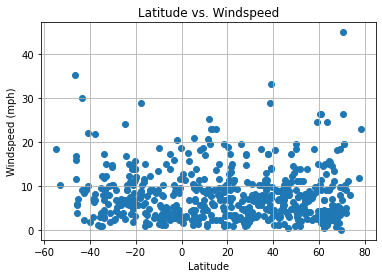

In [14]:
plt.scatter(city_df['Latitude'], city_df['Wind'])
plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)
print(f"The plot shows that there is no significant correlation between latitude and windspeed")
plt.savefig("latitude_wind.png")

## Linear Regression

In [15]:
northern = city_df.loc[city_df["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = city_df.loc[city_df["Latitude"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8019656730059797
The plot shows that the closer to the equator, the higher the temperature


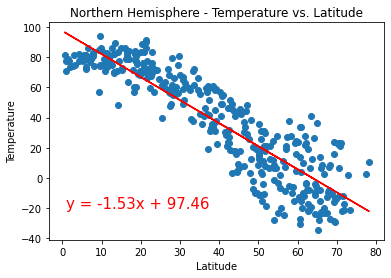

In [16]:
x_values = northern['Latitude']
y_values = northern["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(1,-20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The plot shows that the closer to the equator, the higher the temperature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.25930794083297576
The plot shows that the closer to the equator, the higher the temperature


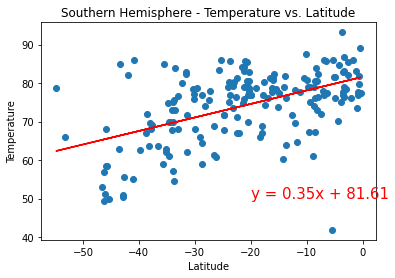

In [17]:
x_values = southern['Latitude']
y_values = southern["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The plot shows that the closer to the equator, the higher the temperature")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11678186494199051
The regression shows that there is not much correlation between humidity and latitude


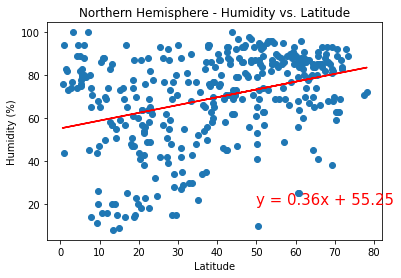

In [18]:
x_values = northern['Latitude']
y_values = northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The regression shows that there is not much correlation between humidity and latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07740461808971838
The regression shows that there is not much correlation between humidity and latitude


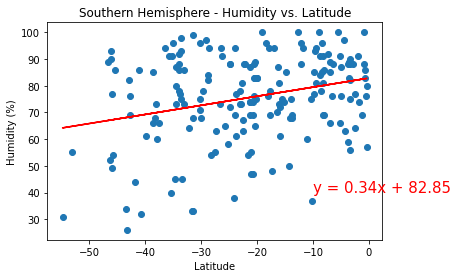

In [19]:
x_values = southern['Latitude']
y_values = southern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The regression shows that there is not much correlation between humidity and latitude")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02584532079985066
The regression shows that there is not much correlation between cloudiness and latitude


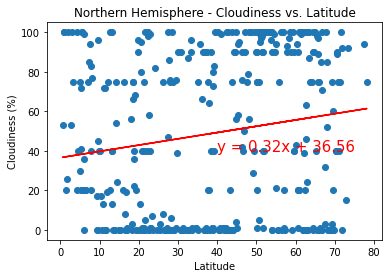

In [20]:
x_values = northern['Latitude']
y_values = northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The regression shows that there is not much correlation between cloudiness and latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0798041889001486
The regression shows that there is not much correlation between cloudiness and latitude


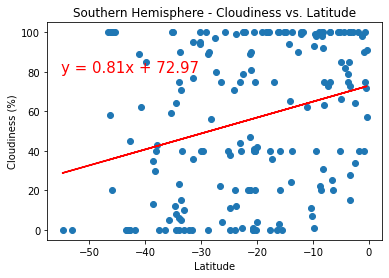

In [21]:
x_values = southern['Latitude']
y_values = southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The regression shows that there is not much correlation between cloudiness and latitude")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.007668631017803e-06
The regression shows that there is not much correlation between humidity and windspeed


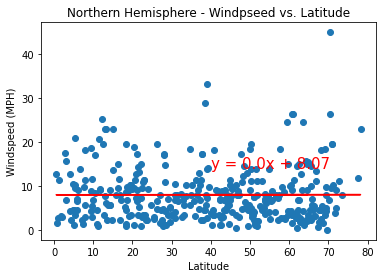

In [22]:
x_values = northern['Latitude']
y_values = northern['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(40,14),fontsize=15,color="red")
plt.title("Northern Hemisphere - Windpseed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (MPH)')
print(f"The regression shows that there is not much correlation between humidity and windspeed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.043145888465647604
The regression shows that there is not much correlation between windspeed and latitude


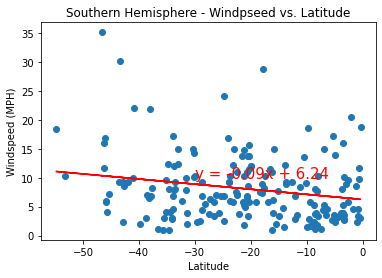

In [23]:
x_values = southern['Latitude']
y_values = southern['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Windpseed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (MPH)')
print(f"The regression shows that there is not much correlation between windspeed and latitude")
plt.show()